# Test 1: Data Science

This test contains four exercises, which should all be attempted. For each exercise, the number of available marks is provided. For some exercises, additional marks are provided for "code clarity". These code clarity marks are awarded for concise, clear, efficient and well commented code.

Feel free to add code cells as required. Just make sure that your cells execute sequentially and that your answers are easy to read and understand.

#### Submission

Upload your completed Jupyter notebook to the submission point on Blackboard. **No other formats will be accepted.**

---

### Part 1: Demographic database

A database has been provided which contains country development indicators produced by United Nations Population Fund, adapted from the [World Population Dashboard](https://www.unfpa.org/data/world-population-dashboard). The SQLite database is called "SWOP-Data-2021.db" and details of the tables and columns can be found in ["README_SWOP-Data-2021.txt"](README_SWOP-Data-2021.txt).

This database contains multiple tables covering country demographics (population change, age of the population etc.), education level (population attending different levels of study) and regions of interest (e.g. "East and Southern Africa Region"). For each country entry this includes both the country name and the standard 2 or 3-letter reference code for the country (for reference see this [country codes list](https://www.nationsonline.org/oneworld/country_code_list.htm)).

#### Exercise 1: Population demographic within each region

The database contains national populations in a set of age ranges, e.g., population aged 0 to 14, 15 to 64, etc. Countries can be grouped together into UNFPA regions, the definitions of which are provided. For each UNFPA region, calculate the mean population (averaged across countries within that region) in the 0 - 14 and 15 - 64 age ranges. Find the UNFPA region with the maximum ratio of mean national populations in the 0 - 14 age range, compared to the 15 - 64 age (i.e., the maximum value of $\frac{population_{0 to 14}}{population_{15 to 64}}$). Print the region with the highest ratio, and the value of the ratio.

*(8 marks + 2 code clarity marks, maximum 10 marks)*

In [1]:
## ANSWER HERE
import pandas as pd
connectable = "sqlite:///SWOP-Data-2021.db"

# Select data I need
query = "SELECT Countries, Population, Population_0to14_percent, Population_15to64_percent from demographic"
demographic = pd.read_sql(query, connectable)

# Using apply function to add column straight forward
demographic["ratio"] = demographic.apply(lambda row: row["Population_0to14_percent"] / row["Population_15to64_percent"], axis = 1)

# Using idxmax to return max value index
max_ratio_row = demographic.loc[demographic["ratio"].idxmax()]

print(f"The region with the highest ratio is {max_ratio_row['Countries']}, The ratio is {max_ratio_row['ratio']}")

The region with the highest ratio is Niger, The ratio is 1.033402922755741


---

### Part 2: Population database


Another set of data has been provided which includes yearly population data from 1960 to 2020. The data within this file has been adapted from population data available from [The World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL).

Rather than being contained in an SQLite database, this is a csv file called "Country_Population_1960_2020.csv".

#### Exercise 2: Population change per decade

Using the data provided:

**(a)** Calculate the decadal (10 year) mean population for each country

**(b)** Use these decadal means to calculate the **percentage** population change for all countries between the decades of the 1960s (1960 - 1969, inclusive) and 2010s (2010 - 2019, inclusive).

**(c)** Print the percentage population change between 1960 and 2010 for Australia and India, and state which country had the largest relative population growth.

*(6 marks + 1 mark for code clarity, 7 marks total)*

In [2]:
# ANSWER HERE
### (A)
import pandas as pd
data = pd.read_csv('Country_Population_1960_2020.csv')

# Convert the first column into timezone
data['Year'] = pd.to_datetime(data['Year'])

# Make the time as Dataframe index
data.set_index('Year', inplace=True)

# Using resample with 10Y
data_10years = data.resample("10Y").mean()
data_10years

C:\Users\1\AppData\Local\Temp\ipykernel_57692\2762933208.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_10years = data.resample("10Y").mean()


,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960-12-31,54208.0,130836765.0,8996967.0,96396419.0,5454938.0,1608800.0,13410.0,92197715.0,92417.0,20481781.0,...,32500.0,32670048.0,63689.0,3.032156e+09,108627.0,947000.0,5315351.0,17099836.0,3070780.0,3776679.0
1970-12-31,57468.0,151332113.0,10104440.4,108826552.7,5734668.2,1893228.3,19179.2,107667934.2,157592.9,22333264.7,...,46817.6,38464621.8,75366.5,3.363804e+09,128381.1,1092400.0,5780920.8,19699769.1,3644225.5,4566270.9
1980-12-31,60183.0,200064213.1,12670090.5,138620691.7,7157672.4,2431085.3,31009.1,143328319.9,617883.8,26065198.8,...,89691.9,49299448.6,101594.5,4.097570e+09,151293.2,1384300.0,6976883.6,25544846.3,5050352.9,6412127.5
1990-12-31,61870.5,268032685.0,12197434.6,181792208.4,10182888.5,2998654.6,45713.8,194967245.0,1431110.3,30466759.3,...,100932.8,61655019.9,131896.2,4.888167e+09,159897.3,1702700.0,9832130.3,33062292.0,7040295.0,9049105.7
2000-12-31,79820.3,354849955.2,17768669.4,237697833.3,14232450.6,3177908.5,62563.7,255262489.1,2499645.4,35011454.1,...,107446.3,75144637.9,168877.4,5.745221e+09,169947.5,1939400.0,15032678.0,41624212.5,9268117.5,11399251.9
2010-12-31,99020.7,461102105.0,25710579.8,310872647.3,19939981.3,2993964.3,78214.5,319969857.4,5417609.1,39075572.4,...,108434.6,84281449.9,212050.4,6.554702e+09,180429.0,1725480.9,20452819.5,48269627.5,12067366.1,12197268.7
2020-12-31,104504.3,603154361.3,34715394.7,408070166.6,28433112.9,2877836.3,78986.2,399800780.8,9390343.5,43344431.8,...,107487.0,93140456.3,274734.8,7.380427e+09,193452.9,1794709.1,26823883.7,55733097.3,16150782.2,13897535.1


In [3]:
### (B)

# Extract mean data
mean_1960s = data_10years.loc['1960-12-31']
mean_2010s = data_10years.loc['2010-12-31']

# Using the correct formula to calculate
percentage_population_change = (mean_2010s - mean_1960s) / mean_1960s * 100
percentage_population_change_df = pd.DataFrame(percentage_population_change, columns = ['percentage_population_change'])
percentage_population_change_df


,percentage_population_change
ABW,82.668056
AFE,252.425486
AFG,185.769413
AFW,222.493979
AGO,265.540017
...,...
XKX,82.204952
YEM,284.787750
ZAF,182.281231
ZMB,292.973971


In [4]:
### (C)

# Use .loc to find the AUS and IND data needed
AUS = percentage_population_change_df.loc['AUS'][0]
IND = percentage_population_change_df.loc['IND'][0]

# Use idxmax and max to find max value and its index
largest_country = percentage_population_change_df.idxmax()
largest_value = percentage_population_change_df.max()
print("Australia", AUS)
print("India", IND)
print("Largest country", largest_country)
print("Largest value", largest_value)


Australia 100.43848684719481
India 156.54214553432107
Largest country percentage_population_change    ARE
dtype: object
Largest value percentage_population_change    5762.13478
dtype: float64


C:\Users\1\AppData\Local\Temp\ipykernel_57692\98093979.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AUS = percentage_population_change_df.loc['AUS'][0]
C:\Users\1\AppData\Local\Temp\ipykernel_57692\98093979.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  IND = percentage_population_change_df.loc['IND'][0]


---

### Part 3: Ice cream sales

A data file, `icecream.csv`, has been provided which contains information on daily ice cream sales for a beach ice cream stall. The dataset contains the following information:
- average temperature of the day in &deg;C
- number of ice creams sold
- whether or not it rained on the day (1=True, 0=False)
- number of hours of sunshine on the day


#### Exercise 3

**(a)** Load the data from `icecream.csv` and print out a quick statistical summary of the dataset, making sure that the summary will include all variables. _(1 mark)_

**(b)** Print the correlation matrix between the variables in the dataset _(1 mark)_

**(c)** Programmatically access the correlation between ice cream sales and temperature, and print to the screen _(1 mark)_

*(3 marks)*

In [5]:
#### ANSWER HERE

### (A)
icecream = pd.read_csv("icecream.csv")

# Using .describe function
icecream.describe()

,temp,ice_cream,rain,sun_hrs
count,100.000000,100.000000,100.000000,100.000000
mean,23.480000,84.920000,0.560000,9.040000
std,4.835642,16.621563,0.498888,3.504456
min,16.000000,52.000000,0.000000,3.000000
25%,19.000000,72.750000,0.000000,6.000000
50%,23.000000,82.500000,1.000000,9.000000
75%,27.000000,97.250000,1.000000,12.000000
max,32.000000,124.000000,1.000000,14.000000


In [6]:
icecream.head()

,temp,ice_cream,rain,sun_hrs
0,22,85,0,9
1,30,96,1,6
2,26,105,0,13
3,23,93,0,10
4,22,79,0,7


In [7]:
### (B)

# Using .corr to get correlation matrix
corr_matrix = icecream.corr()
corr_matrix

,temp,ice_cream,rain,sun_hrs
temp,1.000000,0.875789,0.021438,-0.001740
ice_cream,0.875789,1.000000,-0.135845,0.425775
rain,0.021438,-0.135845,1.000000,-0.001387
sun_hrs,-0.001740,0.425775,-0.001387,1.000000


In [8]:
print(corr_matrix['temp']['ice_cream'])

0.8757885944433781


#### Exercise 4

The correlation matrix indicated a moderate positive correlation between number of hours of sun and number of ice cream sales, in addition to the higher correlation between temperature and ice cream sales. Let's see whether we can use **both** _temperature_ **and** _number of hours of sun_ to predict the number of ice cream sales. _Hint: This means that your training data will have two features._

**(a)** Using your model, predict the number of ice cream sales when temperature is 30.5 &deg;C **and** when there are 10.5 hours of sunshine. *(3 marks)*

**(b)** Plot your model against the data and comment on the results. *(3 marks)*

*(6 marks)*

In [9]:
#### ANSWER HERE

### (A)
from sklearn import linear_model

# Defining model
model = linear_model.LinearRegression(fit_intercept = True)

X = icecream[['temp', 'sun_hrs']]

Y = icecream['ice_cream']

# Training data
model.fit(X, Y)

# Create prediction
icecream['pred_y'] = model.predict(X)

predict = model.predict([[30.5, 10.5]])
print(predict)

[109.02955493]


e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


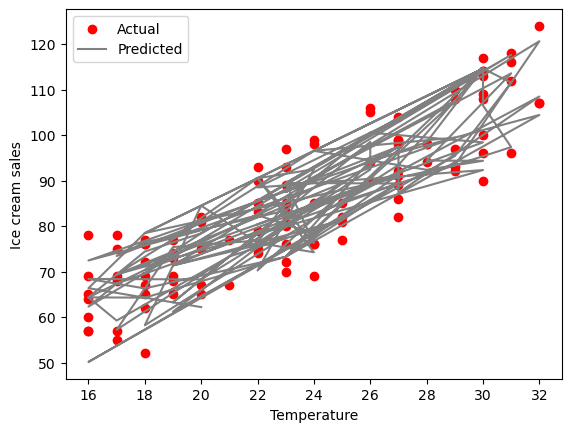

In [10]:

### (B)
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()


# Create a scatter plot of the known x-y values
ax.scatter(icecream["temp"], Y, color = 'red', label='Actual')

# Draw a line to represent the predicted y-values
ax.plot(icecream["temp"], icecream["pred_y"], color = 'gray', label='Predicted')

# Axis labels to be tidy
plt.xlabel('Temperature')
plt.ylabel('Ice cream sales')
plt.legend()
plt.show()




#COMMENT
# When we only have 1 feature, its suitable to use a 2D plot, but we have 2 features in this question.
# We need to change the plot into a 3D plot as shown below.

e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


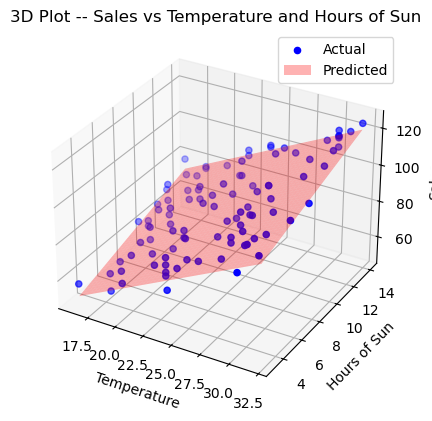

In [11]:
import numpy as np

fig = plt.figure()

# Creating a 1x1 grid
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(icecream['temp'], icecream['sun_hrs'], Y, color='blue', label='Actual')

# The np.meshgrid() function creates a grid of temperature (temp_grid) and sunshine (sun_hrs_grid) values that covers the range of both features. 
# This is necessary because the plot_surface() method needs a grid of input values to plot a surface.
temp_range = np.linspace(icecream['temp'].min(), icecream['temp'].max(), 100)
sun_hrs_range = np.linspace(icecream['sun_hrs'].min(), icecream['sun_hrs'].max(), 100)
temp_grid, sun_hrs_grid = np.meshgrid(temp_range, sun_hrs_range)


# Create a 2D grid of predicted values (Z values) based on the model
predicted_sales = model.predict(np.c_[temp_grid.ravel(), sun_hrs_grid.ravel()])
predicted_sales = predicted_sales.reshape(temp_grid.shape)

# Plot the predicted surface
ax.plot_surface(temp_grid, sun_hrs_grid, predicted_sales, color='red', alpha=0.3, label='Predicted')

# Set axis labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Hours of Sun')
ax.set_zlabel('Sales')
ax.set_title('3D Plot -- Sales vs Temperature and Hours of Sun')

plt.legend()
plt.show()